# # SpringBoard Capstone2: Direct Marketing
## Unit16: Pre-processing and Training Data Development 
> Data from Kaggle.com: https://www.kaggle.com/c/bankdirectmarketing/data 

In [1]:
# pip install imbalanced-learn

In [2]:
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [31]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [4]:
market_pre = pd.read_csv('Market_explored.csv', index_col = 0)
print(market_pre.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [5]:
cat = market_pre[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
market_cat = pd.get_dummies(cat,drop_first = True)
print(market_cat.shape)
market_cat.head()

(22500, 43)


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23986,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
20663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13958,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
28184,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [6]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', \
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
market_num = market_pre[num]
market_all = market_cat.join(market_num)
market_all.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,49,4457,1,115,2,1.4,92.479703,-35.498996,0.705058,4990.198481
23986,0,0,0,0,0,0,1,0,0,0,...,52,4797,1,402,2,-1.8,93.439161,-39.331320,4.245479,5144.563621
20663,1,0,0,0,0,0,0,0,0,0,...,46,169,1,999,1,-1.8,93.075000,-47.100000,1.445000,5099.100000
13958,0,1,0,0,0,0,0,0,0,0,...,26,376,28,999,0,1.4,93.444000,-36.100000,4.967000,5228.100000
28184,0,0,0,0,0,0,0,0,0,0,...,47,3033,1,252,4,-3.4,94.352376,-33.073620,1.208702,5025.420036


#### SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [9]:
def fit_logreg_model(X,y,c):
    X = market_all
    y = market_pre['subscribe']
    over = SMOTE(sampling_strategy=c)
    X, y = over.fit_resample(X, y)
    counter = Counter(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    logreg = LogisticRegression()
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    return [c, counter, f1_score(y_test, y_pred, average=None), f1_score(y_test, y_pred, average='macro')]


In [18]:
for c in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(fit_logreg_model(X,y,c))

[0.3, Counter({'no': 19548, 'yes': 5864}), array([0.87609571, 0.39327146]), 0.6346835868167724]
[0.4, Counter({'no': 19548, 'yes': 7819}), array([0.85926275, 0.51363451]), 0.6864486312136765]
[0.5, Counter({'no': 19548, 'yes': 9774}), array([0.83815097, 0.56577708]), 0.7019640227698407]
[0.6, Counter({'no': 19548, 'yes': 11728}), array([0.8155061 , 0.62879153]), 0.7221488140890158]
[0.7, Counter({'no': 19548, 'yes': 13683}), array([0.79555718, 0.67163301]), 0.7335950980478718]
[0.8, Counter({'no': 19548, 'yes': 15638}), array([0.74650954, 0.68431967]), 0.7154146054633596]
[0.9, Counter({'no': 19548, 'yes': 17593}), array([0.76298538, 0.72855905]), 0.7457722142688742]
[1, Counter({'no': 19548, 'yes': 19548}), array([0.74242618, 0.74222848]), 0.7423273278063649]


### use sampling_strategy = 0.9 for SMOTE( ) over sampling for category 1, f1_macro = 0.746

In [12]:
# # build scaler based on training data and apply it to test data to then also scale the test data
# import sklearn.preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# X_train_scaled[0:1]

In [13]:
# scaler = preprocessing.MinMaxScaler().fit(X_train)
# X_train_scaled=scaler.transform(X_train)
# X_test_scaled=scaler.transform(X_test)
# X_train_scaled[0:1]

In [14]:
# scaler = preprocessing.StandardScaler().fit(X_train[num])
# X_train_scaled=scaler.transform(X_train[num])
# X_test_scaled=scaler.transform(X_test[num])

In [15]:
# # Instantiate the logistic regression classifier: logreg
# logreg = LogisticRegression()
# # Fit it to the training data
# logreg.fit(X_train,y_train)
# y_pred = logreg.predict(X_test)
# # Compute and print the confusion matrix and classification report
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [21]:
X = market_all
y = market_pre['subscribe']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
from sklearn.model_selection import GridSearchCV
# Create the hyperparameter grid
c_space = np.logspace(-4, 4, 30)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro')
# Fit it to the training data
logreg_cv.fit(X_train,y_train)
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Average f1_macro: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 62.10169418915616, 'penalty': 'l2'}
Tuned Logistic Regression Average f1_macro: 0.7596970413364377


In [43]:
X = market_all
y = market_pre['subscribe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled[0:1]

RF = RandomForestClassifier(max_depth=3, random_state = 1)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

print('f1_no_average: ', f1_score(y_test, y_pred, average=None))
print('f1_macro: ', f1_score(y_test, y_pred, average='macro'))


f1_no_average:  [0.93073542 0.        ]
f1_macro:  0.4653677082095759


In [70]:
def fit_RF_model(X,y,c):
    X = market_all
    y = market_pre['subscribe']
    over = SMOTE(sampling_strategy=c)
    X, y = over.fit_resample(X, y)
    counter = Counter(y)
    print('c: ', c, ', Counter: ', counter)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    scaler = preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled=scaler.transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    X_train_scaled[0:1]

    RF = RandomForestClassifier(max_depth=3, random_state = 1)
    RF.fit(X_train,y_train)
    y_pred = RF.predict(X_test)
 
    print('f1_none: ', f1_score(y_test, y_pred, average=None))
    print('f1_macro: ', f1_score(y_test, y_pred, average='macro')) 
    return[]


In [71]:
for c in [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(fit_RF_model(X,y,c))

c:  0.3 , Counter:  Counter({'no': 19548, 'yes': 5864})
f1_none:  [0.8772246  0.15372671]
f1_macro:  0.5154756541048499
[]
c:  0.4 , Counter:  Counter({'no': 19548, 'yes': 7819})
f1_none:  [0.8575804  0.27906977]
f1_macro:  0.5683250828020942
[]
c:  0.5 , Counter:  Counter({'no': 19548, 'yes': 9774})
f1_none:  [0.87147548 0.60848568]
f1_macro:  0.7399805844045028
[]
c:  0.6 , Counter:  Counter({'no': 19548, 'yes': 11728})
f1_none:  [0.86319755 0.71080139]
f1_macro:  0.7869994724704218
[]
c:  0.7 , Counter:  Counter({'no': 19548, 'yes': 13683})
f1_none:  [0.85623859 0.76747391]
f1_macro:  0.8118562500681563
[]
c:  0.8 , Counter:  Counter({'no': 19548, 'yes': 15638})
f1_none:  [0.84617296 0.79462508]
f1_macro:  0.8203990225864455
[]
c:  0.9 , Counter:  Counter({'no': 19548, 'yes': 17593})
f1_none:  [0.83700887 0.81544202]
f1_macro:  0.8262254463278809
[]
c:  1 , Counter:  Counter({'no': 19548, 'yes': 19548})
f1_none:  [0.82818004 0.83485893]
f1_macro:  0.8315194866541111
[]


### use SMOTE(sample_strategy = 0.9) for RandomForest model also.

In [86]:
# do the procedures again
X = market_all
y = market_pre['subscribe']

over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [87]:
# Define Parameters
max_depth=[8, 16, 32]
n_estimators = [8, 32, 64, 256]
param_grid = {'max_depth': max_depth, 
              'n_estimators': n_estimators}

# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state = 1)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5, scoring = 'f1_macro')
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df


Best: [0.88599583 0.88958966 0.89136782 0.89267038 0.91283978 0.91837906
 0.9215375  0.92326765 0.91554422 0.92530404 0.92619598 0.92868443], using {'max_depth': 32, 'n_estimators': 256}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.302984,0.063742,0.096886,0.023003,8,8,"{'max_depth': 8, 'n_estimators': 8}",0.879243,0.883009,0.889929,0.891314,0.886485,0.885996,0.004439,12
1,1.166684,0.341932,0.145112,0.072132,8,32,"{'max_depth': 8, 'n_estimators': 32}",0.882057,0.885866,0.890380,0.894640,0.895005,0.889590,0.005021,11
2,1.586052,0.194181,0.125949,0.018732,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.885066,0.890914,0.893258,0.894978,0.892623,0.891368,0.003409,10
3,5.483046,0.163779,0.273093,0.025518,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.887783,0.890590,0.893295,0.897370,0.894315,0.892670,0.003268,9
4,0.331990,0.010627,0.064215,0.003372,16,8,"{'max_depth': 16, 'n_estimators': 8}",0.910817,0.903825,0.918114,0.919194,0.912249,0.912840,0.005548,8
5,1.125955,0.024464,0.093180,0.002270,16,32,"{'max_depth': 16, 'n_estimators': 32}",0.911988,0.913444,0.918805,0.924607,0.923051,0.918379,0.005020,6
6,2.252558,0.048553,0.133646,0.003177,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.917681,0.916138,0.923032,0.927475,0.923361,0.921538,0.004119,5
7,8.873225,0.254568,0.377858,0.009776,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.919711,0.918333,0.924385,0.926800,0.927109,0.923268,0.003619,4
8,0.370088,0.004851,0.066334,0.003181,32,8,"{'max_depth': 32, 'n_estimators': 8}",0.911147,0.910747,0.916850,0.921143,0.917835,0.915544,0.004016,7
9,1.298856,0.029749,0.100165,0.002046,32,32,"{'max_depth': 32, 'n_estimators': 32}",0.918589,0.923934,0.923418,0.930734,0.929845,0.925304,0.004486,3


[[3722  206]
 [ 335 3166]]


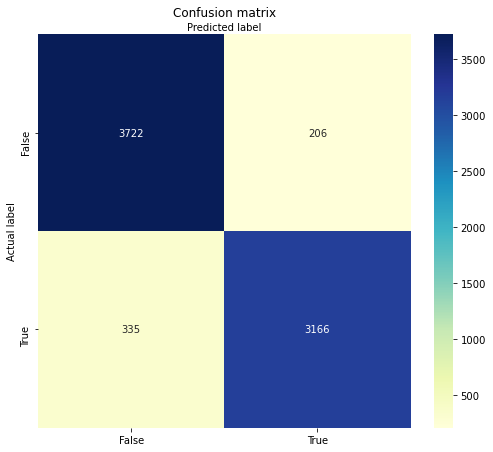

In [88]:
# Extract the best decision forest 
best_clf = grid_results.best_estimator_
y_pred = best_clf.predict(X_test)

# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()